## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (28, 18)

In [20]:
football = pd.read_csv("results.csv")
football

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True


## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [3]:
# Firstly, we find the home scores and the away scores for each country in separate DataFrames.
FIFA = football[football['tournament'] == 'FIFA World Cup']

FIFA_home = FIFA.groupby('home_team').sum()
FIFA_home = FIFA_home.drop(['away_score', 'neutral'], axis = 1) # Only keeping the home_score sum
FIFA_home.loc[:, 'team'] = FIFA_home.index # column on which we shall merge the two scores DataFrames

FIFA_away = FIFA.groupby('away_team').sum()
FIFA_away = FIFA_away.drop(['home_score', 'neutral'], axis = 1) # Only keeping the away_score sum
FIFA_away.loc[:, 'team'] = FIFA_away.index # column on which we shall merge the two scores DataFrames

# Then, we proceed to merge the two DataFrames and add the scores to get the total scores for each country.
FIFA_scores = pd.merge(FIFA_home, FIFA_away, on = 'team')
FIFA_scores.loc[:, 'total_score'] = FIFA_scores['home_score'] + FIFA_scores['away_score']
FIFA_scores = FIFA_scores.sort_values(by = 'total_score', ascending = False)[:10]

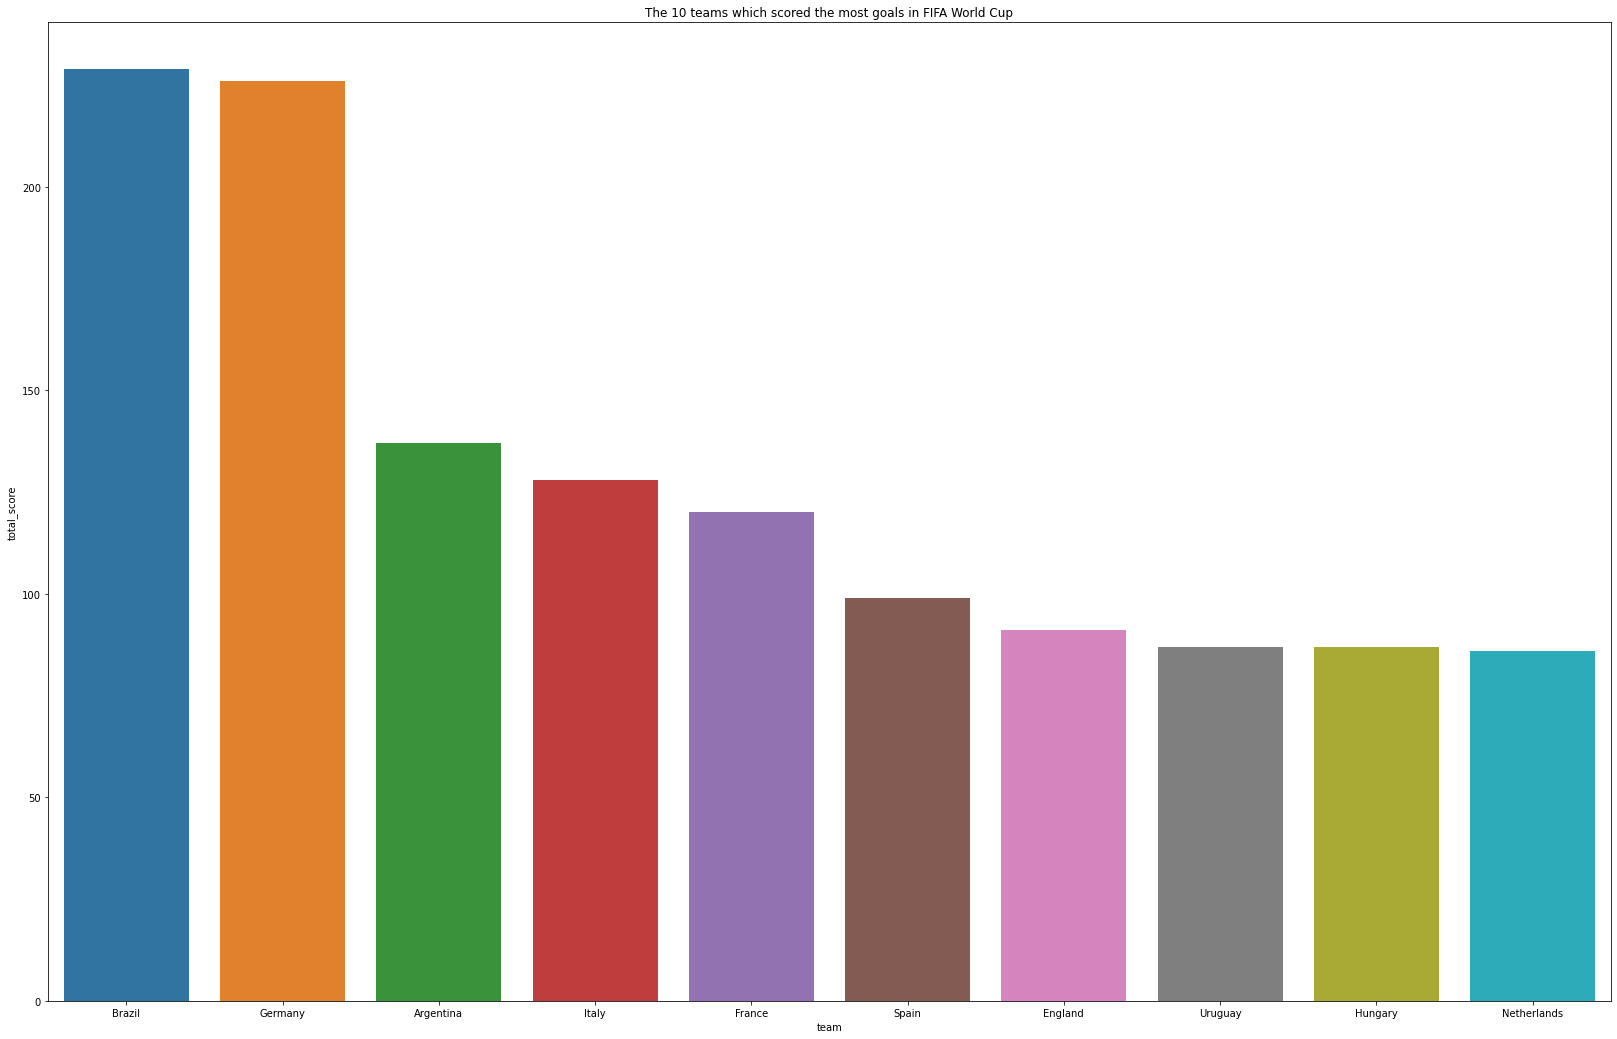

In [4]:
# Finally, we plot the data.
sns.barplot(x = 'team', y = 'total_score', data = FIFA_scores)
plt.title('The 10 teams which scored the most goals in FIFA World Cup')
plt.show()

## Task
What is the number of matches played in each tournament throughout history?

In [5]:
# We shall limit to ten values for the histogram. As such, we determine the 9 tournaments with the most 
# matches played and set all the other categories to the category 'other'.
football['tournament'].value_counts()[:9]

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
Copa América                              813
AFC Asian Cup qualification               724
African Cup of Nations                    690
CECAFA Cup                                620
Name: tournament, dtype: int64

In [39]:
# We set up the new column tournament_mod to prepare the data for the desired histogram.
football.loc[(football['tournament'].isin(['Friendly',
                                      'FIFA World Cup qualification',
                                      'UEFA Euro qualification',
                                      'African Cup of Nations qualification',
                                      'FIFA World Cup',
                                      'Copa América',
                                      'AFC Asian Cup qualification',
                                      'African Cup of Nations',
                                      'CECAFA Cup'])) ,'tournament_mod'] = football['tournament']

football.loc[(football['tournament'].isin(['Friendly',
                                      'FIFA World Cup qualification',
                                      'UEFA Euro qualification',
                                      'African Cup of Nations qualification',
                                      'FIFA World Cup',
                                      'Copa América',
                                      'AFC Asian Cup qualification',
                                      'African Cup of Nations',
                                      'CECAFA Cup'])) == False ,'tournament_mod'] = 'Other'

tournaments = football['tournament_mod'].value_counts()

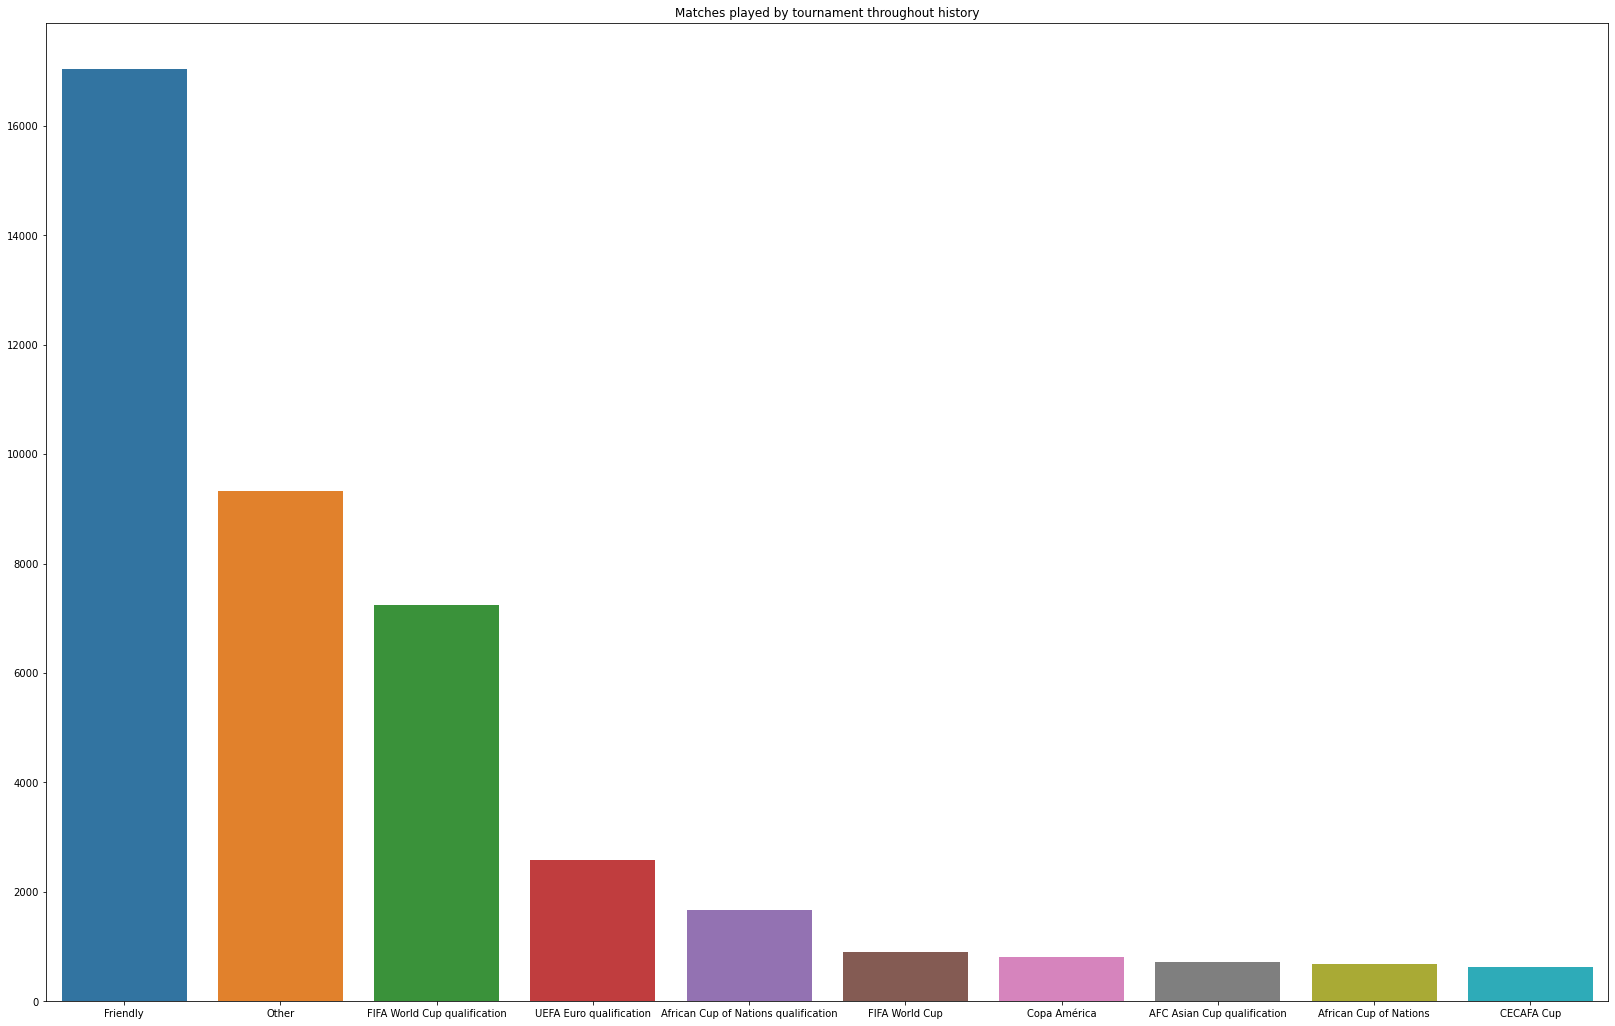

In [41]:
# Finally, we plot the data.
sns.barplot(x = tournaments.index, y = tournaments.values)
plt.title('Matches played by tournament throughout history')
plt.show()

In [13]:
football = football.drop('tournament_mod', axis = 1)

## Task 
Show the trend in number of matches per year.

In [8]:
# We first create a new column for the year.
football.loc[:,'year'] = pd.to_datetime(football['date'])
football.loc[:,'year'] = football['year'].dt.year

# Then, we count the number of matches for each year.
count = football.groupby('year').count()

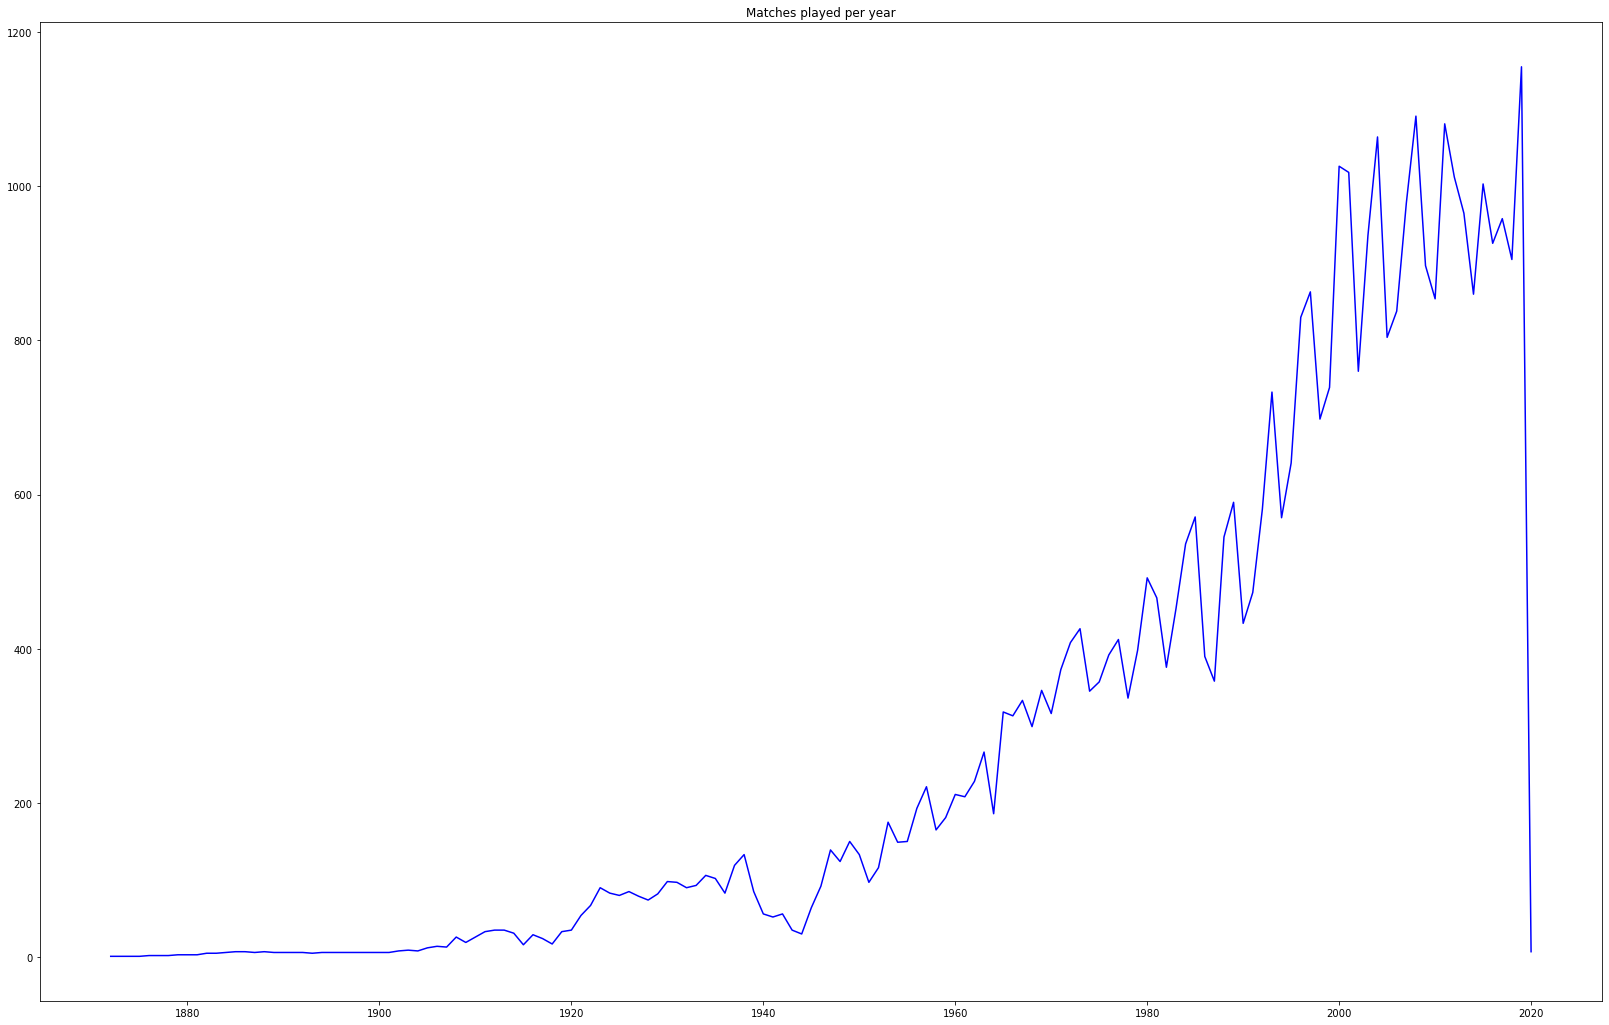

In [9]:
# Lastly, we plot the data.
plt.plot(count['date'], 'blue')
plt.title('Matches played per year')
plt.show()

In [10]:
football = football.drop('year', axis = 1)

## Task
Which teams are the most successful ones? (winning percentage)

In [13]:
# We create new columns representing home team wins, away team wins and draws as a first step
football.loc[football['home_score'] > football['away_score'], 'home_win'] = 1
football.loc[(football['home_score'] == football['away_score']) | (football['home_score'] < football['away_score']), 'home_win'] = 0

football.loc[football['away_score'] > football['home_score'], 'away_win'] = 1
football.loc[(football['away_score'] == football['home_score']) | (football['away_score'] < football['home_score']), 'away_win'] = 0

football.loc[football['home_score'] == football['away_score'], 'draw'] = 1
football.loc[football['home_score'] != football['away_score'], 'draw'] = 0

In [15]:
# Then, we create 2 separate DataFrames for wins, losses and draws for each country.

home_wins = football.groupby('home_team').sum()
home_wins = home_wins.drop(['home_score', 'away_score', 'neutral'], axis = 1) # Only keeping the variables for matches won, tied and lost while being the home team
home_wins.loc[:, 'team'] = home_wins.index # column on which we shall merge the two DataFrames
home_wins = home_wins.rename(columns = {'draw' : 'home_draw', 'away_win' : 'home_lose'}) # renaming some variables appropriately

away_wins = football.groupby('away_team').sum()
away_wins = away_wins.drop(['home_score', 'away_score', 'neutral'], axis = 1) # Only keeping the variables for matches won, tied and lost while being the away team
away_wins.loc[:, 'team'] = away_wins.index # column on which we shall merge the two DataFrames
away_wins = away_wins.rename(columns = {'draw' : 'away_draw', 'home_win' : 'away_lose'}) # renaming some variables appropriately

# As the next step, we proceed to merge the DataFrames and calculate the winning percentages for each country.
football_wins = pd.merge(home_wins, away_wins, on = 'team')
football_wins.loc[:, 'total_wins'] = football_wins['home_win'] + football_wins['away_win']
football_wins.loc[:, 'total_matches'] = (football_wins['home_win'] + football_wins['home_lose'] + football_wins['home_draw'] 
                                         + football_wins['away_win'] + football_wins['away_lose'] + football_wins['away_draw'])
football_wins.loc[:, 'winning_percentage'] = 100 * (football_wins['total_wins'] / football_wins['total_matches'])
football_wins = football_wins.sort_values(by = 'winning_percentage', ascending = False)[:10]

,home_win,home_lose,home_draw,team,away_lose,away_win,away_draw,total_wins,total_matches,winning_percentage
295,4.0,0.0,1.0,Yorkshire,1.0,1.0,0.0,5.0,7.0,71.428571
197,20.0,3.0,5.0,Padania,3.0,9.0,3.0,29.0,43.0,67.441860
135,38.0,3.0,7.0,Jersey,13.0,17.0,4.0,55.0,82.0,67.073171
64,2.0,1.0,1.0,County of Nice,1.0,4.0,0.0,6.0,9.0,66.666667
204,2.0,0.0,0.0,Parishes of Jersey,1.0,0.0,0.0,2.0,3.0,66.666667
24,21.0,5.0,6.0,Basque Country,4.0,16.0,5.0,37.0,57.0,64.912281
35,404.0,56.0,108.0,Brazil,101.0,221.0,91.0,625.0,981.0,63.710499
6,7.0,1.0,4.0,Andalusia,0.0,1.0,0.0,8.0,13.0,61.538462
214,8.0,2.0,1.0,Rhodes,3.0,3.0,1.0,11.0,18.0,61.111111
65,0.0,1.0,0.0,Crimea,1.0,3.0,0.0,3.0,5.0,60.000000


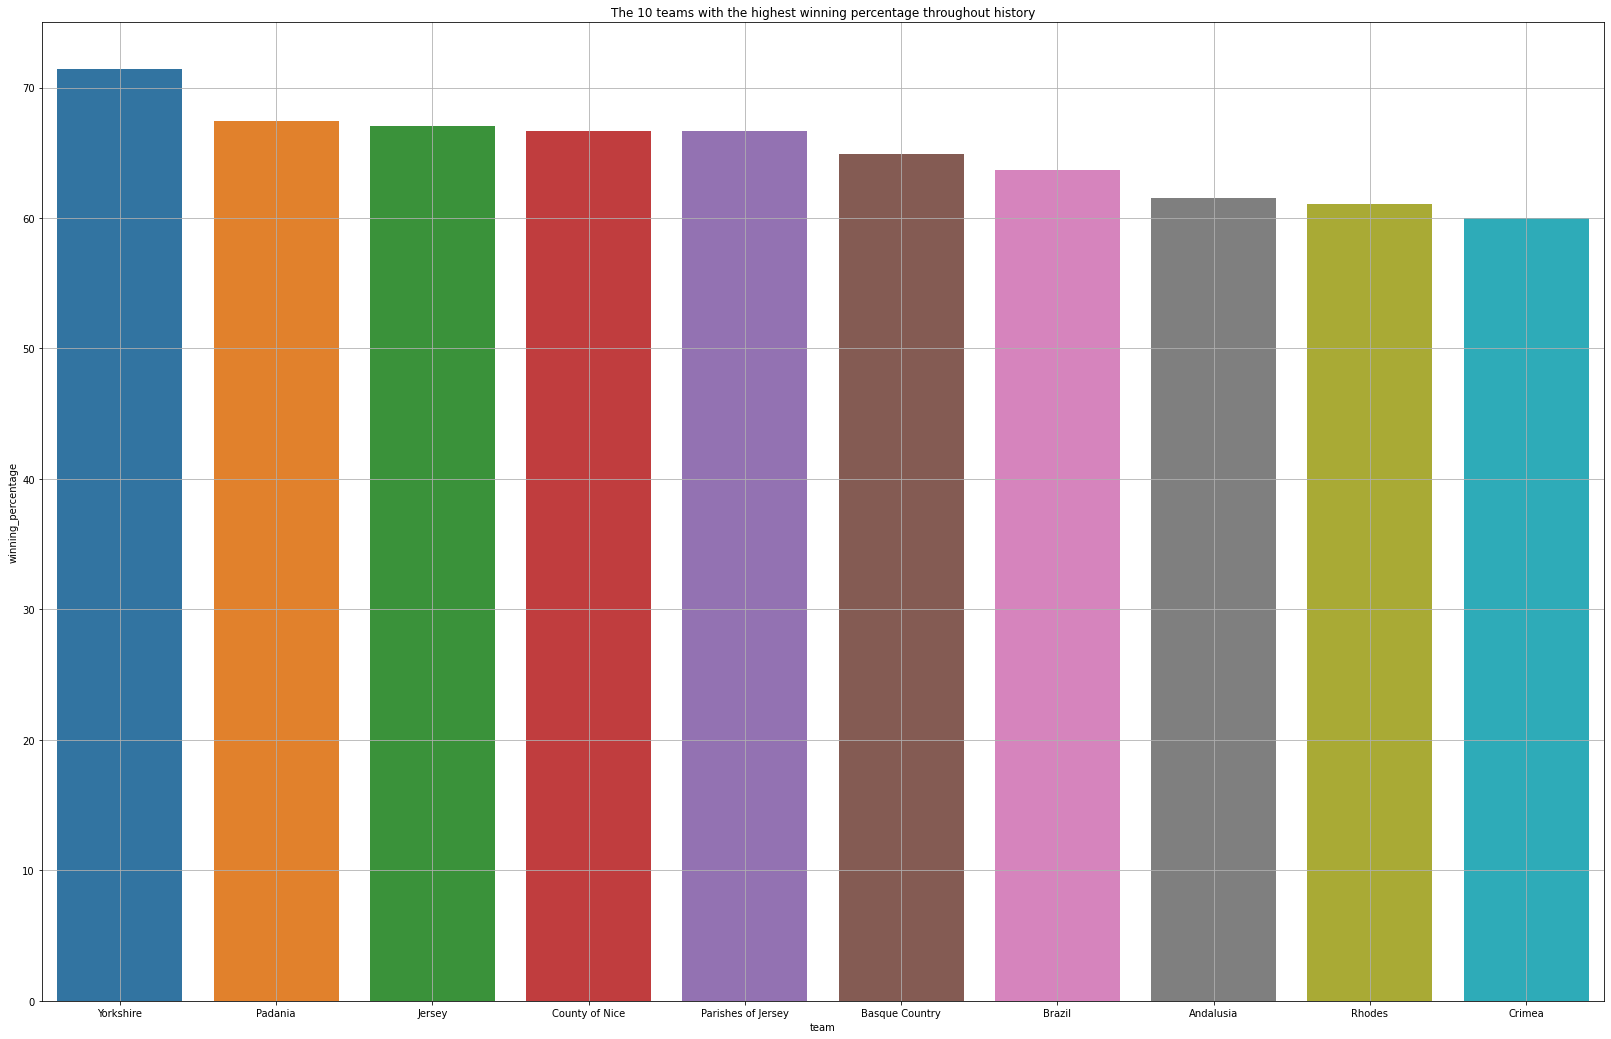

In [17]:
# Finally, we plot the data.
sns.barplot(x = 'team', y = 'winning_percentage', data = football_wins)
plt.title('The 10 teams with the highest winning percentage throughout history')
plt.grid()
plt.show()

In [18]:
football = football.drop(['home_win', 'away_win', 'draw'], axis = 1)

## Task
Which teams played against each other the most?

In [21]:
# we shall create a series that puts the names of both teams in alphabetic order.
pairs = []
i = 0
while i < 41586:
    matchup = [football['home_team'][i], football['away_team'][i]]
    sorted_pair = sorted(matchup)
    list_to_string = ' and '.join([str(team) for team in sorted_pair])
    pairs.append(list_to_string)
    i += 1

In [23]:
# setting up the new series
teams = pd.Series(pairs)

In [34]:
result = teams.value_counts()[:10]
result.index

Index(['Argentina and Uruguay', 'Austria and Hungary',
       'Belgium and Netherlands', 'England and Scotland', 'Norway and Sweden',
       'Kenya and Uganda', 'Denmark and Sweden', 'Scotland and Wales',
       'Argentina and Brazil', 'England and Wales'],
      dtype='object')

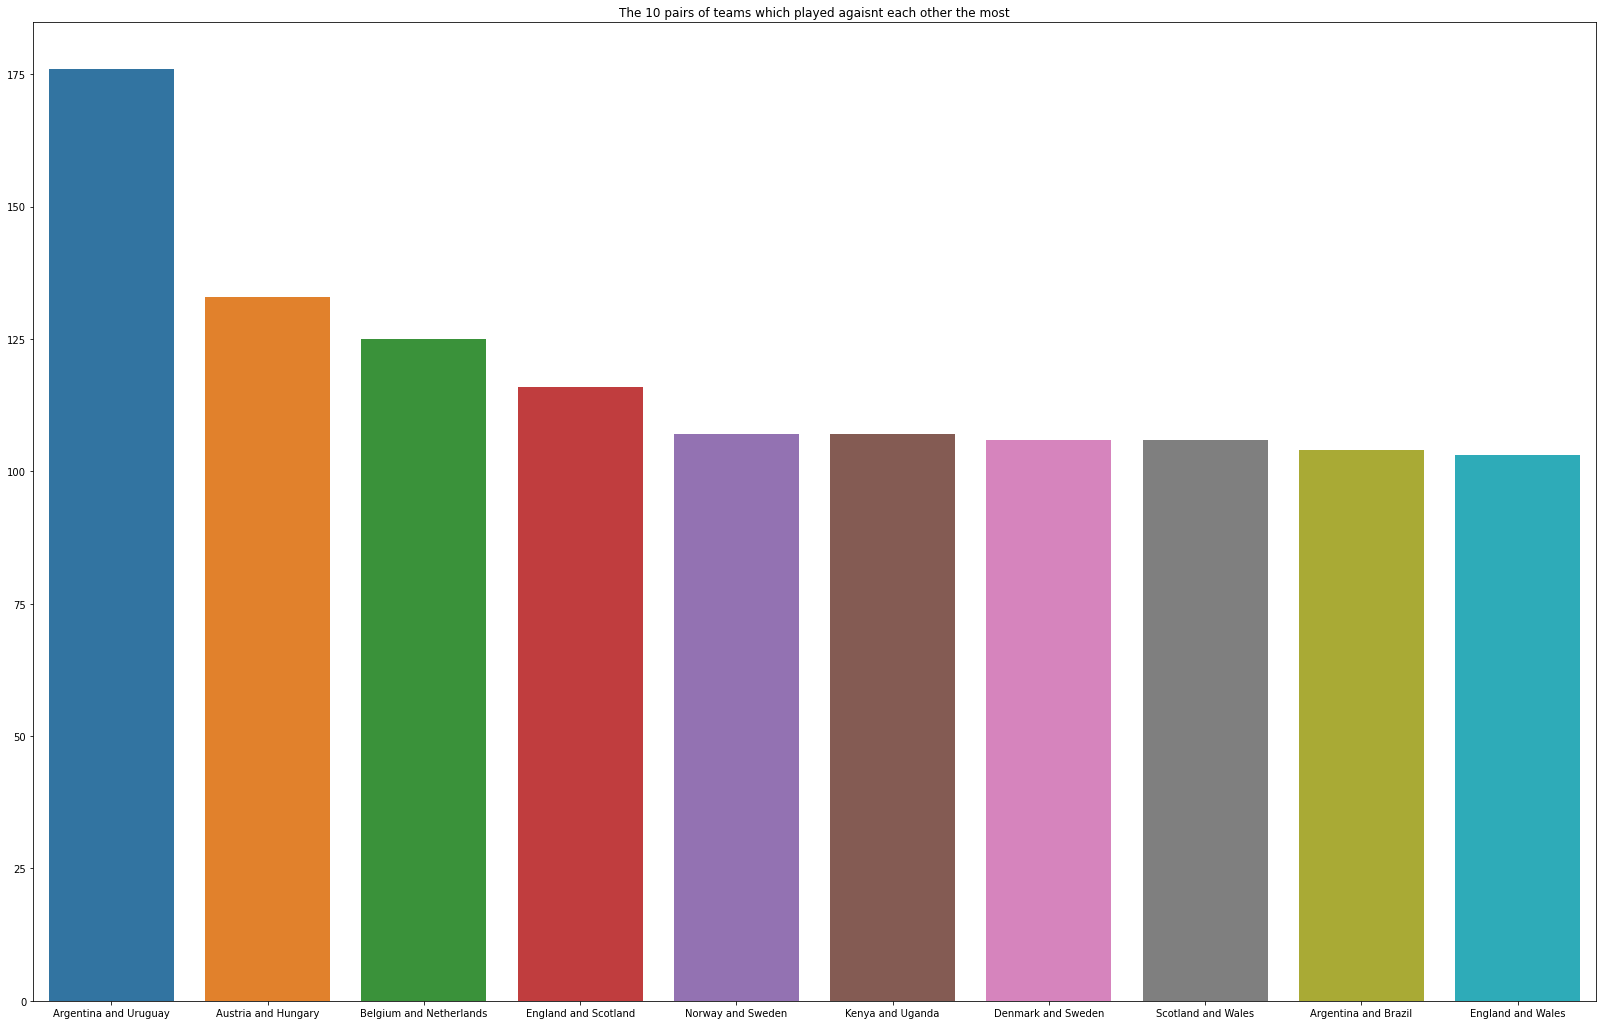

In [37]:
# Finally, we plot the data.
sns.barplot(x = result.index, y = result.values)
plt.title('The 10 pairs of teams which played agaisnt each other the most')
plt.show()

## Task (Stretch)
Apply your creativity to show some additional insights from the data.